In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("train.csv")
pair_data = pd.read_csv("pairs.csv")

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

A vectorizer for the different categories

In [4]:
category_vectorizer = TfidfVectorizer()
categories_to_vectors = category_vectorizer.fit_transform(data["categories"].fillna("nocategory"))

categories_to_vectors.shape

(1138812, 966)

In [5]:
len(category_vectorizer.get_feature_names_out())

966

In [6]:
for i in range(966):
    if categories_to_vectors[2,i] != 0:
        print(categories_to_vectors[2,i], i)

print(category_vectorizer.get_feature_names_out()[61], category_vectorizer.get_feature_names_out()[736])

0.719554176510768 61
0.6944363088620227 736
barbershops salons


A vectorizer for the different names

In [7]:
name_vectorizer = TfidfVectorizer()
name_to_vectors = name_vectorizer.fit_transform(data["name"].fillna("noname"))

name_to_vectors.shape

(1138812, 380410)

In [8]:
category_vectorizer.get_feature_names_out()

array(['academic', 'acai', 'accessories', 'acehnese', 'acupuncturists',
       'administrative', 'adult', 'advertising', 'afghan', 'african',
       'agencies', 'agriturismos', 'airfields', 'airport', 'airports',
       'alleys', 'alsatian', 'alternative', 'amenities', 'american',
       'amphitheaters', 'andhra', 'anhui', 'animal', 'antique',
       'apartments', 'apres', 'aquariums', 'arcades', 'architecture',
       'areas', 'arenas', 'arepa', 'argentinian', 'aristocrat',
       'armenian', 'art', 'arts', 'asian', 'assisted', 'astrologers',
       'athletics', 'atms', 'attractions', 'auditoriums', 'australian',
       'austrian', 'auto', 'automotive', 'auvergne', 'awadhi', 'baby',
       'badminton', 'bagel', 'baggage', 'baiano', 'bakeries', 'balinese',
       'ballrooms', 'bangladeshi', 'banks', 'barbershops', 'bars',
       'baseball', 'bases', 'basketball', 'bath', 'bathing', 'bathrooms',
       'batik', 'bavarian', 'bays', 'bbq', 'beach', 'beaches', 'beauty',
       'bed', 'beer

Merging vectorized features to data

In [9]:
df_cat_to_vec = pd.DataFrame({'cats to vecs': [categories_to_vectors[i] for i in range(len(data))]})

In [10]:
df_cat_to_vec

,cats to vecs
0,"(0, 62)\t1.0"
1,"(0, 713)\t0.3775981045427575\n (0, 110)\t0...."
2,"(0, 61)\t0.719554176510768\n (0, 736)\t0.69..."
3,"(0, 769)\t0.3753519698291182\n (0, 636)\t0...."
4,"(0, 797)\t0.9337794127490154\n (0, 713)\t0...."
...,...
1138807,"(0, 586)\t1.0"
1138808,"(0, 251)\t0.7071067811865476\n (0, 421)\t0...."
1138809,"(0, 13)\t0.7998249332224249\n (0, 756)\t0.6..."
1138810,"(0, 72)\t0.7788610395073589\n (0, 459)\t0.6..."


In [11]:
df_name_to_vec = pd.DataFrame({'names to vecs': [name_to_vectors[i] for i in range(len(data))]})

In [12]:
data_vectorized = pd.merge(data, df_cat_to_vec,
                           how='left',
                           left_index=True, # Merge on both indexes, since right only has 0...
                           right_index=True # all the other rows will be NaN
                          )

In [13]:
data_vectorized = pd.merge(data_vectorized, df_name_to_vec,
                           how='left',
                           left_index=True, # Merge on both indexes, since right only has 0...
                           right_index=True # all the other rows will be NaN
                          )

In [14]:
data_vectorized

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,cats to vecs,names to vecs
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e,"(0, 62)\t1.0","(0, 164579)\t0.6592987474067973\n (0, 20728..."
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83,"(0, 713)\t0.3775981045427575\n (0, 110)\t0....","(0, 139512)\t0.7631359372151048\n (0, 47169..."
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477,"(0, 61)\t0.719554176510768\n (0, 736)\t0.69...","(0, 287952)\t0.8175150034060434\n (0, 30012..."
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3,"(0, 769)\t0.3753519698291182\n (0, 636)\t0....","(0, 224739)\t1.0"
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb,"(0, 797)\t0.9337794127490154\n (0, 713)\t0....","(0, 55841)\t0.7917844227597964\n (0, 47736)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138807,E_ffffb80854f713,青ガエル,35.659020,139.700780,NaN,渋谷区,東京都,150-0043,JP,NaN,NaN,NaN,P_7ccbeab96cd82e,"(0, 586)\t1.0","(0, 366426)\t1.0"
1138808,E_ffffbf9a83e0ba,Deshon Place,40.872116,-79.945343,325 New Castle Rd,Butler,PA,16001,US,NaN,NaN,Housing Developments,P_db0abc418e7365,"(0, 251)\t0.7071067811865476\n (0, 421)\t0....","(0, 65232)\t0.8858848029756723\n (0, 174462..."
1138809,E_ffffc572b4d35b,İzmir Adnan Menderes Havaalanı,38.423733,27.142826,NaN,İzmir,NaN,NaN,TR,NaN,NaN,Airport Services,P_ae96252a6a9380,"(0, 13)\t0.7998249332224249\n (0, 756)\t0.6...","(0, 243614)\t0.46766027675258715\n (0, 9890..."
1138810,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,NaN,338362989,BBQ Joints,P_146662f246d418,"(0, 72)\t0.7788610395073589\n (0, 459)\t0.6...","(0, 334003)\t0.7890787767658546\n (0, 35401..."


Moving onto the pairs data. We'll basically do the same thing --- create new columns corresponding to the vectorized categories and names. In particular, we're using the same vectorizers as above. We just need to transform the corresponding data. Do not refit.

In [15]:
cat1_to_vec = category_vectorizer.transform(pair_data["categories_1"].fillna("nocategory"))
cat2_to_vec = category_vectorizer.transform(pair_data["categories_2"].fillna("nocategory"))

In [16]:
print(cat1_to_vec.shape)
print(cat2_to_vec.shape)

(578907, 966)
(578907, 966)


In [17]:
len(category_vectorizer.get_feature_names_out())

966

In [18]:
pair_data

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578902,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5,1.368397,103.898145,332 Hougang Ave 5,Singapore,Singapore,530332,SG,NaN,...,103.897452,Hougang ave 5,NaN,NaN,NaN,SG,NaN,NaN,NaN,True
578903,E_ffff8cc1b92ab3,Fawsley Hall,52.206426,-1.178646,Fawsley Nr Daventry,Daventry,Northants,NN11 3BA,GB,NaN,...,-1.179698,NaN,NaN,NaN,NaN,GB,NaN,NaN,Gyms or Fitness Centers,False
578904,E_ffff989ae206f8,Cricket Wireless Authorized Retailer,36.130623,-86.715636,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com/stores/ll/US/T...,...,-86.723855,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com,+16156799940,Mobile Phone Shops,True
578905,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,NaN,...,139.774890,NaN,NaN,NaN,NaN,JP,NaN,NaN,BBQ Joints,True


In [19]:
df_cat1_to_vec = pd.DataFrame({'cat1 to vec': [cat1_to_vec[i] for i in range(len(pair_data))]})
df_cat2_to_vec = pd.DataFrame({'cat2 to vec': [cat2_to_vec[i] for i in range(len(pair_data))]})

In [20]:
pair_data_vectorized = pd.merge(pair_data, df_cat1_to_vec,
                                how='left',
                                left_index=True, # Merge on both indexes, since right only has 0...
                                right_index=True # all the other rows will be NaN
                               )

In [21]:
pair_data_vectorized = pd.merge(pair_data_vectorized, df_cat2_to_vec,
                                how='left',
                                left_index=True, # Merge on both indexes, since right only has 0...
                                right_index=True # all the other rows will be NaN
                               )

In [22]:
pair_data_vectorized

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match,cat1 to vec,cat2 to vec
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,NaN,NaN,NaN,BE,NaN,NaN,Bars,True,"(0, 62)\t1.0","(0, 62)\t1.0"
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False,"(0, 769)\t0.3753519698291182\n (0, 636)\t0....","(0, 820)\t0.4966526213263468\n (0, 285)\t0...."
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,NaN,NaN,NaN,PH,NaN,NaN,Spas,True,"(0, 798)\t1.0","(0, 798)\t1.0"
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True,"(0, 741)\t0.7941723972802074\n (0, 651)\t0....","(0, 741)\t0.7941723972802074\n (0, 651)\t0...."
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False,"(0, 769)\t0.45645624040834043\n (0, 191)\t0...","(0, 769)\t0.597095594976191\n (0, 250)\t0.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578902,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5,1.368397,103.898145,332 Hougang Ave 5,Singapore,Singapore,530332,SG,NaN,...,NaN,NaN,NaN,SG,NaN,NaN,NaN,True,"(0, 710)\t0.522650685096239\n (0, 202)\t0.5...","(0, 586)\t1.0"
578903,E_ffff8cc1b92ab3,Fawsley Hall,52.206426,-1.178646,Fawsley Nr Daventry,Daventry,Northants,NN11 3BA,GB,NaN,...,NaN,NaN,NaN,GB,NaN,NaN,Gyms or Fitness Centers,False,"(0, 418)\t1.0","(0, 602)\t0.49430109198707933\n (0, 388)\t0..."
578904,E_ffff989ae206f8,Cricket Wireless Authorized Retailer,36.130623,-86.715636,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com/stores/ll/US/T...,...,Nashville,TN,37217,US,https://www.cricketwireless.com,+16156799940,Mobile Phone Shops,True,"(0, 769)\t0.3753519698291182\n (0, 636)\t0....","(0, 769)\t0.3753519698291182\n (0, 636)\t0...."
578905,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,NaN,...,NaN,NaN,NaN,JP,NaN,NaN,BBQ Joints,True,"(0, 459)\t0.6271965251318892\n (0, 72)\t0.7...","(0, 459)\t0.6271965251318892\n (0, 72)\t0.7..."


In [23]:
pair_data_vectorized.loc[578902]['cat2 to vec']

<1x966 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [24]:
cat_dists_cosine = [0]*(len(pair_data_vectorized))

for i in range(len(pair_data_vectorized)):
    if i%50000==0:
        print(i/len(pair_data))
    A = pair_data_vectorized['cat1 to vec'][i]@pair_data_vectorized['cat2 to vec'][i].T
    cat_dists_cosine[i] = A[0,0]
print('done!')

0.0
0.08636965868438282
0.17273931736876563
0.2591089760531484
0.34547863473753126
0.43184829342191405
0.5182179521062968
0.6045876107906797
0.6909572694750625
0.7773269281594453
0.8636965868438281
0.950066245528211
done!


In [25]:
cat_dists_cosine

[1.0,
 0.0,
 1.0,
 1.0,
 0.7903296869271104,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.9999999999999998,
 1.0,
 0.17462820921230504,
 1.0,
 1.0,
 1.0,
 0.0,
 0.9999999999999998,
 1.0000000000000002,
 1.0,
 1.0,
 0.5712950478959055,
 1.0,
 0.0,
 0.0,
 0.4104768839431031,
 0.4104768839431031,
 0.0,
 1.0000000000000002,
 0.0,
 0.6255291600921695,
 1.0,
 0.0,
 0.0,
 0.0,
 0.8379174659889674,
 0.0,
 0.61848092765157,
 0.8017301288933849,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.7315990759365354,
 0.0,
 0.0,
 0.0,
 0.9999999999999998,
 1.0,
 0.0,
 0.0,
 1.0,
 0.9999999999999998,
 0.0,
 0.9999999999999999,
 0.0,
 1.0,
 0.0,
 0.7573950990198837,
 0.7573950990198837,
 0.0,
 0.9999999999999999,
 1.0,
 0.0,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 0.0,
 1.0000000000000002,
 0.6123813597940565,
 0.0,
 0.0,
 0.6044110580045734,
 0.7619851317587688,
 1.0,
 0.0,
 0.7579444542338669,
 0.0,
 0.9999999999999998,
 0.5164296254849831,
 0.643520387959343,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,


In [26]:
'''
cat_dists_euclid = [0]*(len(pair_data_vectorized))

for i in range(len(pair_data_vectorized)):
    if i%50000==0:
        print(i/len(pair_data))
    A = pair_data_vectorized['cat1 to vec'][i] - pair_data_vectorized['cat2 to vec'][i]
    cat_dists_euclid[i] = (A@A.T)[0,0]
print('done!')
'''

"\ncat_dists_euclid = [0]*(len(pair_data_vectorized))\n\nfor i in range(len(pair_data_vectorized)):\n    if i%50000==0:\n        print(i/len(pair_data))\n    A = pair_data_vectorized['cat1 to vec'][i] - pair_data_vectorized['cat2 to vec'][i]\n    cat_dists_euclid[i] = (A@A.T)[0,0]\nprint('done!')\n"

In [27]:
#cat_dists_euclid

In [28]:
pair_data_vectorized['cat sim'] = cat_dists_cosine

In [29]:
name1_to_vec = name_vectorizer.transform(pair_data["name_1"].fillna("noname"))
name2_to_vec = name_vectorizer.transform(pair_data["name_2"].fillna("noname"))

In [30]:
df_name1_to_vec = pd.DataFrame({'name1 to vec': [name1_to_vec[i] for i in range(len(pair_data))]})
df_name2_to_vec = pd.DataFrame({'name2 to vec': [name2_to_vec[i] for i in range(len(pair_data))]})

In [31]:
pair_data_vectorized = pd.merge(pair_data_vectorized,
                                df_name1_to_vec,
                                how='left',
                                left_index=True, # Merge on both indexes, since right only has 0...
                                right_index=True # all the other rows will be NaN
                               )

In [32]:
pair_data_vectorized = pd.merge(pair_data_vectorized,
                                df_name2_to_vec,
                                how='left',
                                left_index=True, # Merge on both indexes, since right only has 0...
                                right_index=True # all the other rows will be NaN
                               )

In [33]:
pair_data_vectorized

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,country_2,url_2,phone_2,categories_2,match,cat1 to vec,cat2 to vec,cat sim,name1 to vec,name2 to vec
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,BE,NaN,NaN,Bars,True,"(0, 62)\t1.0","(0, 62)\t1.0",1.00000,"(0, 207286)\t0.652699675167778\n (0, 164579...","(0, 164579)\t0.8702272630106325\n (0, 44982..."
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,TR,NaN,NaN,Electronics Stores,False,"(0, 769)\t0.3753519698291182\n (0, 636)\t0....","(0, 820)\t0.4966526213263468\n (0, 285)\t0....",0.00000,"(0, 224739)\t1.0","(0, 224739)\t1.0"
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,PH,NaN,NaN,Spas,True,"(0, 798)\t1.0","(0, 798)\t1.0",1.00000,"(0, 205547)\t0.6438821994279326\n (0, 10933...","(0, 218690)\t0.6315514925331787\n (0, 20554..."
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,US,NaN,NaN,Sandwich Places,True,"(0, 741)\t0.7941723972802074\n (0, 651)\t0....","(0, 741)\t0.7941723972802074\n (0, 651)\t0....",1.00000,"(0, 220800)\t0.7539241550253251\n (0, 19310...","(0, 220800)\t1.0"
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False,"(0, 769)\t0.45645624040834043\n (0, 191)\t0...","(0, 769)\t0.597095594976191\n (0, 250)\t0.5...",0.79033,"(0, 55708)\t0.5242700638609066\n (0, 48157)...","(0, 55726)\t1.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578902,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5,1.368397,103.898145,332 Hougang Ave 5,Singapore,Singapore,530332,SG,NaN,...,SG,NaN,NaN,NaN,True,"(0, 710)\t0.522650685096239\n (0, 202)\t0.5...","(0, 586)\t1.0",0.00000,"(0, 103351)\t0.5363755722982021\n (0, 36961...","(0, 47418)\t0.555112585547621\n (0, 36992)\..."
578903,E_ffff8cc1b92ab3,Fawsley Hall,52.206426,-1.178646,Fawsley Nr Daventry,Daventry,Northants,NN11 3BA,GB,NaN,...,GB,NaN,NaN,Gyms or Fitness Centers,False,"(0, 418)\t1.0","(0, 602)\t0.49430109198707933\n (0, 388)\t0...",0.00000,"(0, 97099)\t0.4315044264464618\n (0, 80619)...","(0, 218680)\t0.2660275965637561\n (0, 20554..."
578904,E_ffff989ae206f8,Cricket Wireless Authorized Retailer,36.130623,-86.715636,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com/stores/ll/US/T...,...,US,https://www.cricketwireless.com,+16156799940,Mobile Phone Shops,True,"(0, 769)\t0.3753519698291182\n (0, 636)\t0....","(0, 769)\t0.3753519698291182\n (0, 636)\t0....",1.00000,"(0, 237719)\t0.4966752777548857\n (0, 18617...","(0, 237719)\t0.4966752777548857\n (0, 18617..."
578905,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,NaN,...,JP,NaN,NaN,BBQ Joints,True,"(0, 459)\t0.6271965251318892\n (0, 72)\t0.7...","(0, 459)\t0.6271965251318892\n (0, 72)\t0.7...",1.00000,"(0, 354017)\t0.6142920185528238\n (0, 33400...","(0, 154463)\t1.0"


In [34]:
name_dists_cosine = [0]*(len(pair_data_vectorized))

for i in range(len(pair_data_vectorized)):
    if i%50000==0:
        print(i/len(pair_data))
    A = pair_data_vectorized['name1 to vec'][i]@pair_data_vectorized['name2 to vec'][i].T
    name_dists_cosine[i] = A[0,0]
print('done!')

0.0
0.08636965868438282
0.17273931736876563
0.2591089760531484
0.34547863473753126
0.43184829342191405
0.5182179521062968
0.6045876107906797
0.6909572694750625
0.7773269281594453
0.8636965868438281
0.950066245528211
done!


In [35]:
name_dists_cosine

[0.7576167461427163,
 1.0,
 0.7753339359779852,
 0.7539241550253251,
 0.0,
 0.7202676611264668,
 1.0000000000000002,
 1.0000000000000002,
 0.8683508637312017,
 0.9999999999999998,
 0.0,
 0.13009780004589203,
 0.4674230218046802,
 1.0,
 0.0,
 0.6891259747284102,
 0.3131963292223593,
 0.0,
 0.0,
 0.7638243662486768,
 0.0,
 0.0,
 0.7795505885051228,
 0.5764892821998914,
 0.7634218072398993,
 0.8888531745924622,
 1.0000000000000002,
 0.5553960038032217,
 0.3656722325242006,
 0.49168697705514575,
 0.8355049966606899,
 0.0,
 0.6694552960479166,
 0.6552303729896108,
 0.38412859299373714,
 1.0,
 0.6437257089439962,
 0.9999999999999999,
 0.5719427238875698,
 0.600279275929378,
 0.0,
 0.7202676611264668,
 0.424748719169618,
 0.424748719169618,
 0.0,
 0.7832841352232949,
 0.424748719169618,
 0.8783682537143109,
 0.4713963414400193,
 0.0,
 0.0,
 0.5377881155494355,
 1.0,
 1.0,
 0.3200633867796513,
 1.0,
 0.763020228351025,
 0.6385035002097752,
 0.93191586050838,
 0.0,
 0.0,
 0.34320533172631135,
 

In [36]:
pair_data_vectorized['name sim'] = name_dists_cosine

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
long_diff = pair_data_vectorized['longitude_2'].values - pair_data_vectorized['longitude_1'].values
lat_diff = pair_data_vectorized['latitude_2'].values - pair_data_vectorized['latitude_1'].values

pair_data_vectorized['longlat dist'] = (long_diff**2 + lat_diff**2)**0.5

In [39]:
pair_train, pair_test = train_test_split(pair_data_vectorized.copy(),
                                         shuffle=True,
                                         random_state=512,
                                         stratify=pair_data_vectorized['match'])

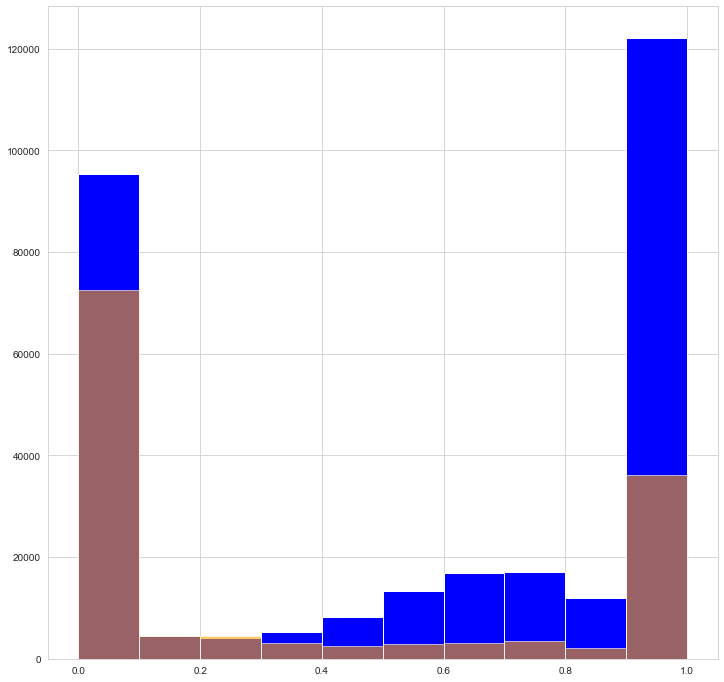

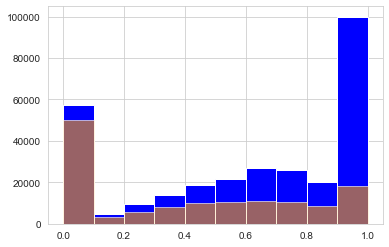

In [40]:
plt.figure(figsize = (12,12))

plt.hist(pair_train[pair_train['match'] == True]['cat sim'],color='blue', label="Match")

plt.hist(pair_train[pair_train['match'] == False]['cat sim'], color='orange', alpha=.6, label="Not Match")

plt.show()

plt.hist(pair_train[pair_train['match'] == True]['name sim'],color='blue', label="Match")

plt.hist(pair_train[pair_train['match'] == False]['name sim'], color='orange', alpha=.6, label="Not Match")

plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
pair_train['match to int'] = pair_train['match'].values.astype(int)
pair_test['match to int'] = pair_test['match'].values.astype(int)

In [43]:
pair_data_vectorized[['name_1','name_2','name sim', 'match']].head(50)

,name_1,name_2,name sim,match
0,Café Stad Oudenaarde,Café Oudenaarde,0.757617,True
1,Turkcell,Turkcell,1.000000,False
2,Island Spa,Island Spa Theater,0.775334,True
3,TOGO'S Sandwiches,Togo's,0.753924,True
4,Coffee Cat,Coffeecat,0.000000,False
5,つじ田 味噌の章,味噌の章,0.720268,True
6,Signature Properties Savannah,Signature Properties Savannah,1.000000,True
7,Inner Workings,Inner Workings,1.000000,True
8,Lake Destiny,Lake destiny field,0.868351,False
9,Marshall Boya Bayi,Marshall Boya Bayi,1.000000,True


In [44]:
log_reg_names = LogisticRegression()
log_reg_categories = LogisticRegression()

log_reg_names.fit(pair_train['name sim'].values.reshape(-1,1),pair_train['match to int'].values)
log_reg_categories.fit(pair_train['cat sim'].values.reshape(-1,1),pair_train['match to int'].values)

LogisticRegression()

In [45]:
name_vote = log_reg_names.predict_proba(pair_test['name sim'].values.reshape(-1,1))
cat_vote = log_reg_categories.predict_proba(pair_test['cat sim'].values.reshape(-1,1))
vote = 0.5*(name_vote + cat_vote)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
vote

array([[0.22047714, 0.77952286],
       [0.28459032, 0.71540968],
       [0.26575993, 0.73424007],
       ...,
       [0.30763946, 0.69236054],
       [0.32284824, 0.67715176],
       [0.30465281, 0.69534719]])

In [48]:
hard_vote = [0]*(len(vote))
thres = 0.6

for i in range(len(vote)):
    if vote[i,1]>thres:
        hard_vote[i] = 1

In [49]:
pair_test['match'].astype(int)

523200    1
196063    1
487092    1
219656    1
347709    1
         ..
82780     0
551862    1
57713     1
418206    0
165313    1
Name: match, Length: 144727, dtype: int64

In [50]:
accuracy_score(hard_vote, pair_test['match'].astype(int))

0.7205013577286892

In [51]:
# Out of order here

log_reg_longlat = LogisticRegression()

log_reg_longlat.fit(pair_train['longlat dist'].values.reshape(-1,1),pair_train['match to int'].values)

LogisticRegression()

In [52]:
longlat_vote = log_reg_longlat.predict_proba(pair_test['longlat dist'].values.reshape(-1,1))

In [53]:
longlat_vote

array([[0.31165574, 0.68834426],
       [0.31168559, 0.68831441],
       [0.31168713, 0.68831287],
       ...,
       [0.31168514, 0.68831486],
       [0.31162816, 0.68837184],
       [0.31162346, 0.68837654]])

Text(0, 0.5, 'Name Similarity')

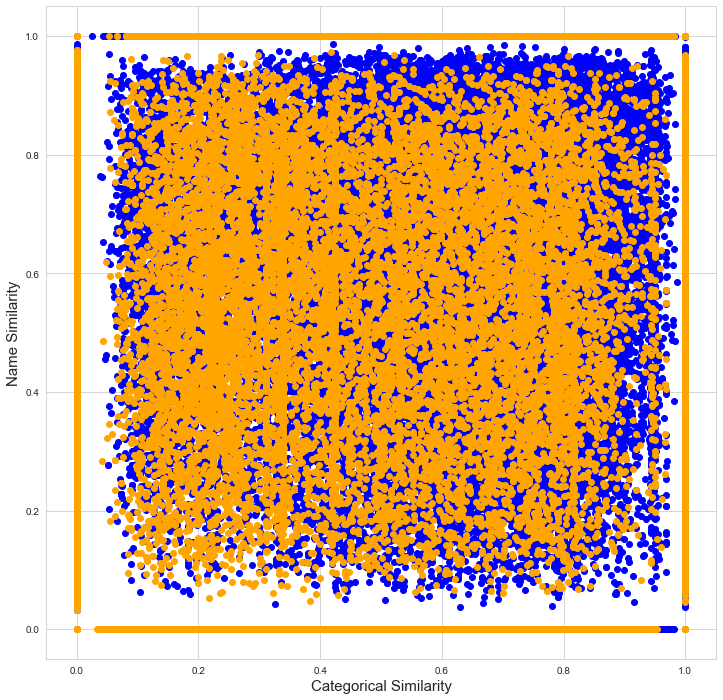

In [68]:
plt.figure(figsize = (12,12))

plt.scatter(pair_train[pair_train['match'] == True]['cat sim'],
            pair_train[pair_train['match'] == True]['name sim'],
            color='blue', label="Match")

plt.scatter(pair_train[pair_train['match'] == False]['cat sim'],
            pair_train[pair_train['match'] == False]['name sim'],
            color='orange', label="Not Match")

plt.xlabel("Categorical Similarity", fontsize=15)
plt.ylabel("Name Similarity", fontsize=15)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
n1 = 1
n2 = 40
threshs = np.arange(0.1, 0.9, 0.05)
accs = np.zeros((n2-n1,len(threshs)))

features = ['longlat dist', 'name sim', 'cat sim']

for i in range(n1,n2):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(pair_train[features], pair_train['match to int'])
    pred_proba = knn.predict_proba(pair_test[features])
    
    for t in range(len(threshs)):
        pred = np.where(pred_proba[:,1] < threshs[t], 0, 1)
    
        accs[i-n1,t] = accuracy_score(pair_test['match to int'].values, pred)

Text(0, 0.5, 'Highest accuracy across thresholds')

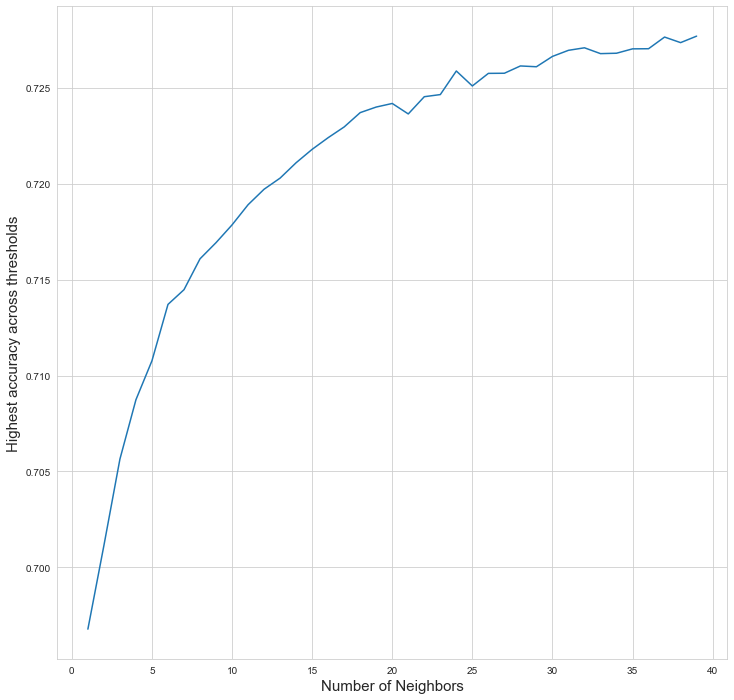

In [79]:
plt.figure(figsize = (12,12))

plt.plot(np.arange(n1,n2,1),
            np.max(accs,axis=1))

plt.xlabel("Number of Neighbors", fontsize=15)
plt.ylabel("Highest accuracy across thresholds", fontsize=15)

In [80]:
import keras

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [148]:
model = models.Sequential()

In [149]:
features = ['longlat dist', 'name sim', 'cat sim']

model.add(layers.Dense(64, activation='relu', input_shape=np.shape(pair_train[features].values[0])) )

# we then add a second layer that is 16 nodes tall
# and uses the relu activation function
# note we don't need the input shape here, 
# it is inferred from the first layer's output
model.add(layers.Dense(64, activation='relu') )

model.add(layers.Dense(64, activation='relu') )

model.add(layers.Dense(64, activation='relu') )


# finally we add the output layer
# this will have a single node, representing a probability
# that the observation has positive sentiment
# this is why the activation is a softmax
# for more information on the softmax see the Practice Problems
model.add(layers.Dense(2, activation='softmax') )

In [150]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                256       
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 2)                 130       
                                                                 
Total params: 12,866
Trainable params: 12,866
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(optimizer='rmsprop', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [152]:
#pair_train[features].values.T
#to_categorical(pair_train['match to int'].values)
pair_train[features].values[0]

array([0.        , 1.        , 0.50432111])

In [153]:
n_epochs = 10
batch_size = 1000
history = model.fit(pair_train[features].values, to_categorical(pair_train['match to int'].values),
                   epochs=n_epochs,
                   batch_size=batch_size,
                   validation_data=(pair_test[features].values, to_categorical(pair_test['match to int'].values)))

Epoch 1/10


2022-05-26 15:52:48.580939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - ETA: 0s - loss: 0.5650 - accuracy: 0.7214

2022-05-26 15:52:52.989177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 5s 11ms/step - loss: 0.5650 - accuracy: 0.7214 - val_loss: 0.5580 - val_accuracy: 0.7246
Epoch 2/10
435/435 [==============================] - 5s 11ms/step - loss: 0.5561 - accuracy: 0.7251 - val_loss: 0.5572 - val_accuracy: 0.7258
Epoch 3/10
435/435 [==============================] - 5s 11ms/step - loss: 0.5539 - accuracy: 0.7253 - val_loss: 0.5546 - val_accuracy: 0.7251
Epoch 4/10
435/435 [==============================] - 5s 11ms/step - loss: 0.5524 - accuracy: 0.7256 - val_loss: 0.5562 - val_accuracy: 0.7115
Epoch 5/10
435/435 [==============================] - 5s 11ms/step - loss: 0.5509 - accuracy: 0.7257 - val_loss: 0.5663 - val_accuracy: 0.7262
Epoch 6/10
435/435 [==============================] - 5s 11ms/step - loss: 0.5493 - accuracy: 0.7261 - val_loss: 0.5526 - val_accuracy: 0.7258
Epoch 7/10
435/435 [==============================] - 5s 11ms/step - loss: 0.5469 - accuracy: 0.7260 - val_loss: 0.5510 - val_accuracy: 0.7257
Epoch 8/10